In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

* 手动实现dropout

In [2]:
def dropout(X, drop_prob):
    X = X.float()
    
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    return mask * X / keep_prob

In [3]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 100
def init_w_b():

    W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
    b1 = torch.zeros(num_hiddens, dtype = torch.float)
    W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
    b2 = torch.zeros(num_outputs,dtype=torch.float)

    params = [W1,b1,W2,b2]
    for param in params:
        param.requires_grad_(requires_grad=True)
    return W1,b1,W2,b2

In [5]:
def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:
        H1 = dropout(H1, drop_prob1)
    return (torch.matmul(H1,W2) + b2).relu()

In [6]:
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X,is_training=False),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [7]:
drop_probs = np.arange(0,1.1,0.1)
Train_ls, Test_ls = [], []
for drop_prob in drop_probs:
    drop_prob1 = drop_prob
    W1,b1,W2,b2 = init_w_b()
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD([W1,b1,W2,b2],lr = 0.001)
    train_ls, test_ls = train()
    Train_ls.append(train_ls)
    Test_ls.append(test_ls)

epoch: 1, train loss: 0.071681, test loss: 0.071374
epoch: 2, train loss: 0.070330, test loss: 0.068983
epoch: 3, train loss: 0.066180, test loss: 0.062613
epoch: 4, train loss: 0.057927, test loss: 0.052760
epoch: 5, train loss: 0.048545, test loss: 0.044383
epoch: 6, train loss: 0.041928, test loss: 0.039178
epoch: 7, train loss: 0.037778, test loss: 0.035779
epoch: 8, train loss: 0.034969, test loss: 0.033403
epoch: 9, train loss: 0.032958, test loss: 0.031667
epoch: 10, train loss: 0.031460, test loss: 0.030341
epoch: 11, train loss: 0.030293, test loss: 0.029305
epoch: 12, train loss: 0.029351, test loss: 0.028439
epoch: 13, train loss: 0.028570, test loss: 0.027721
epoch: 14, train loss: 0.027908, test loss: 0.027113
epoch: 15, train loss: 0.027338, test loss: 0.026583
epoch: 16, train loss: 0.026842, test loss: 0.026133
epoch: 17, train loss: 0.026412, test loss: 0.025722
epoch: 18, train loss: 0.026032, test loss: 0.025388
epoch: 19, train loss: 0.025696, test loss: 0.025069
ep

epoch: 17, train loss: 0.021914, test loss: 0.014828
epoch: 18, train loss: 0.021362, test loss: 0.014354
epoch: 19, train loss: 0.020834, test loss: 0.013908
epoch: 20, train loss: 0.020144, test loss: 0.013481
epoch: 1, train loss: 0.071779, test loss: 0.071555
epoch: 2, train loss: 0.070897, test loss: 0.069989
epoch: 3, train loss: 0.068412, test loss: 0.065649
epoch: 4, train loss: 0.062816, test loss: 0.057084
epoch: 5, train loss: 0.054997, test loss: 0.047093
epoch: 6, train loss: 0.048045, test loss: 0.039005
epoch: 7, train loss: 0.042720, test loss: 0.033245
epoch: 8, train loss: 0.038800, test loss: 0.029132
epoch: 9, train loss: 0.036030, test loss: 0.026112
epoch: 10, train loss: 0.033878, test loss: 0.023914
epoch: 11, train loss: 0.032040, test loss: 0.022108
epoch: 12, train loss: 0.030530, test loss: 0.020696
epoch: 13, train loss: 0.029639, test loss: 0.019555
epoch: 14, train loss: 0.028388, test loss: 0.018547
epoch: 15, train loss: 0.027548, test loss: 0.017714
ep

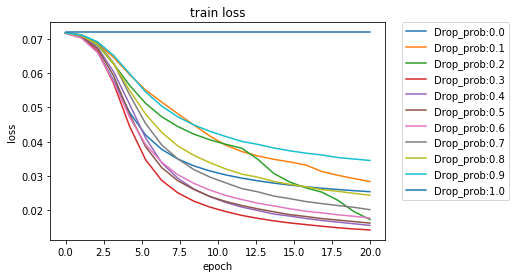

In [12]:
x = np.linspace(0,len(train_ls),len(train_ls))
for i in range(0,len(drop_probs)):
    plt.plot(x,Train_ls[i],label= 'Drop_prob:%.1f'%(drop_probs[i]),linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
# plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('train loss')
plt.show()

* torch.nn实现dropout

In [14]:
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens, drop_prob):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(drop_prob)
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

In [17]:
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [18]:
drop_probs = np.arange(0,1.1,0.1)
torch_Train_ls, torch_Test_ls = [], []
for drop_prob in drop_probs:
    num_inputs, num_outputs, num_hiddens = 784, 10, 100
    net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens,drop_prob)
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)
    train_ls, test_ls = train()
    torch_Train_ls.append(train_ls)
    torch_Test_ls.append(test_ls)

epoch: 1, train loss: 0.071915, test loss: 0.071952
epoch: 2, train loss: 0.071716, test loss: 0.071620
epoch: 3, train loss: 0.071203, test loss: 0.070775
epoch: 4, train loss: 0.069801, test loss: 0.068446
epoch: 5, train loss: 0.066684, test loss: 0.064254
epoch: 6, train loss: 0.062201, test loss: 0.059422
epoch: 7, train loss: 0.057775, test loss: 0.055295
epoch: 8, train loss: 0.054154, test loss: 0.052086
epoch: 9, train loss: 0.051319, test loss: 0.049586
epoch: 10, train loss: 0.049086, test loss: 0.047607
epoch: 11, train loss: 0.047294, test loss: 0.046005
epoch: 12, train loss: 0.045835, test loss: 0.044707
epoch: 13, train loss: 0.044636, test loss: 0.043619
epoch: 14, train loss: 0.043652, test loss: 0.042734
epoch: 15, train loss: 0.042840, test loss: 0.042003
epoch: 16, train loss: 0.042170, test loss: 0.041407
epoch: 17, train loss: 0.041613, test loss: 0.040908
epoch: 18, train loss: 0.041146, test loss: 0.040491
epoch: 19, train loss: 0.040749, test loss: 0.040131
ep

epoch: 17, train loss: 0.021052, test loss: 0.020273
epoch: 18, train loss: 0.020600, test loss: 0.019945
epoch: 19, train loss: 0.020033, test loss: 0.019432
epoch: 20, train loss: 0.019568, test loss: 0.018972
epoch: 1, train loss: 0.071804, test loss: 0.071657
epoch: 2, train loss: 0.070960, test loss: 0.070203
epoch: 3, train loss: 0.068299, test loss: 0.065871
epoch: 4, train loss: 0.062373, test loss: 0.058375
epoch: 5, train loss: 0.054411, test loss: 0.050226
epoch: 6, train loss: 0.047462, test loss: 0.044124
epoch: 7, train loss: 0.042333, test loss: 0.040292
epoch: 8, train loss: 0.038682, test loss: 0.036885
epoch: 9, train loss: 0.035986, test loss: 0.034400
epoch: 10, train loss: 0.033723, test loss: 0.032511
epoch: 11, train loss: 0.032112, test loss: 0.030974
epoch: 12, train loss: 0.030590, test loss: 0.029536
epoch: 13, train loss: 0.029360, test loss: 0.028710
epoch: 14, train loss: 0.028299, test loss: 0.027359
epoch: 15, train loss: 0.027588, test loss: 0.026753
ep

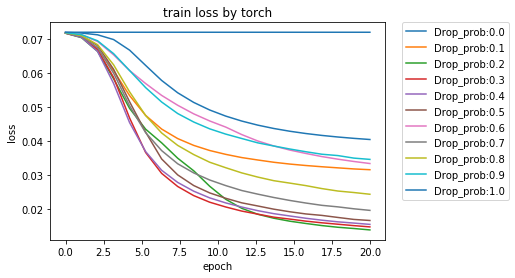

In [19]:
x = np.linspace(0,len(train_ls),len(train_ls))
for i in range(0,len(drop_probs)):
    plt.plot(x,torch_Train_ls[i],label= 'Drop_prob:%.1f'%(drop_probs[i]),linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
# plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('train loss by torch')
plt.show()